# Regression Decision Tree

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
df = pd.read_csv("Dataset.csv")
df.head()

,country,Region,Employment: Industry (% of employed),Education: Primary gross enrol. ratio (female per 100 pop.),"Population age distribution (60+ years, %)","Population age distribution (0-14 years, %)","Pop. using improved sanitation facilities (rural, %)","Pop. using improved sanitation facilities (urban, %)","Pop. using improved drinking water (rural, %)","Pop. using improved drinking water (urban, %)",...,Education: Secondary gross enrol. ratio (female per 100 pop.),Infant mortality rate (per 1000 live births,GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Services (% of employed),Individuals using the Internet (per 100 inhabitants),"Fertility rate, total (live births per woman)",Urban population (% of total population),Economy: Agriculture (% of GVA),happiness.score
0,Afghanistan,SouthernAsia,17.0,83.5,4.0,44.9,19.788235,32.217647,20.400000,32.400000,...,36.800000,60.1,544.0,47.1,35.8,8.3,5.4,24.8,27.3,3.575
1,Albania,SouthernEurope,18.6,107.3,17.9,18.7,50.100000,43.500000,58.870588,85.400000,...,95.100000,9.2,3939.0,41.4,40.0,63.3,1.7,57.4,22.5,4.959
2,Algeria,NorthernAfrica,31.0,113.0,8.9,28.7,23.100000,17.000000,65.900000,79.500000,...,91.623529,24.9,4178.0,10.3,58.7,38.2,3.0,70.8,12.1,5.605
3,Angola,MiddleAfrica,8.6,105.9,3.6,47.1,17.911765,31.111765,37.011765,66.811765,...,40.270588,78.2,4167.0,50.6,40.8,12.4,6.0,63.4,9.1,4.033
4,Argentina,SouthAmerica,23.7,111.2,14.9,25.2,65.994118,46.700000,77.464706,91.358824,...,110.200000,12.1,14971.0,0.3,76.1,68.0,2.3,91.5,6.1,6.574


# 1. Model with All Independent Variables

In [3]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Extract features and lables 
df = df.drop('country', axis = 1)
df_copy = pd.get_dummies(df)
y = df['happiness.score']
X = df_copy.drop('happiness.score', axis=1)
X_list = df.iloc [:,2:23]
X_list

X = np.array(X)
y = np.array(y)
#Split the dataset into training and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

#Fitting the data
regressor = DecisionTreeRegressor (random_state = 0)
regressor.fit (X_train,y_train)

#Predicting the test set results 
y_pred = regressor.predict(X_test)


# Calculate and display accuracy
print('Accuracy_2:', regressor.score(X_train, y_train))
print()


#Error checking
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mae = mean_absolute_error (y_test, y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
mse = mean_squared_error (y_test, y_pred)
r_square = r2_score (y_test, y_pred)

print('Mean Absolute Error (MAE)\t:', mae )
print('Mean Absolute Percentage Error (MAPE)\t:',mape)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))
print('R-Square Error\t:', r_square)

Accuracy_2: 1.0

Mean Absolute Error (MAE)	: 0.4857377139857551
Mean Absolute Percentage Error (MAPE)	: 0.10062329850801797
Mean Squared Error (MSE) 	: 0.3942299478442273
Root Mean Squared Error (RMSE) 	: 0.6278773350298825
R-Square Error	: 0.6557986812067381


In [4]:
data = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
data

,Real Values,Predicted Values
0,3.808,4.535
1,4.644,4.959
2,5.902,5.973
3,4.120,4.550
4,4.857,5.227
...,...,...
56,5.360,5.074
57,3.875,4.460
58,6.670,5.098
59,5.102,5.848


## Visualizing a Decision Tree

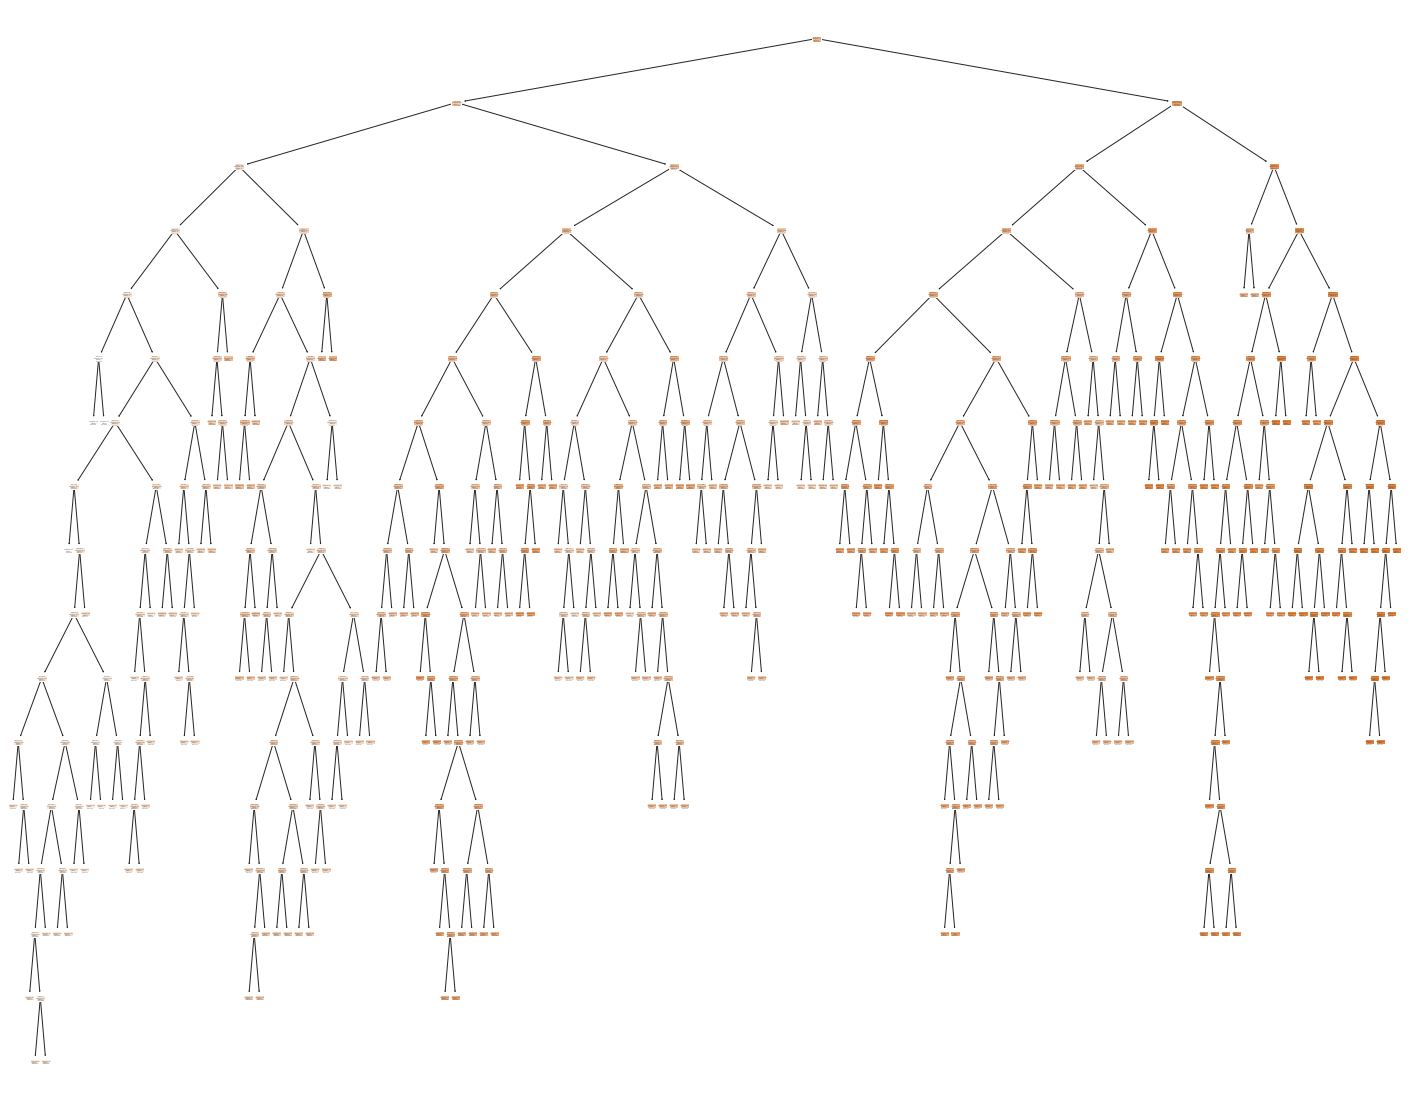

In [5]:
from sklearn import tree
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regressor, filled=True)

### Smaller tree visualization (depth = 3)

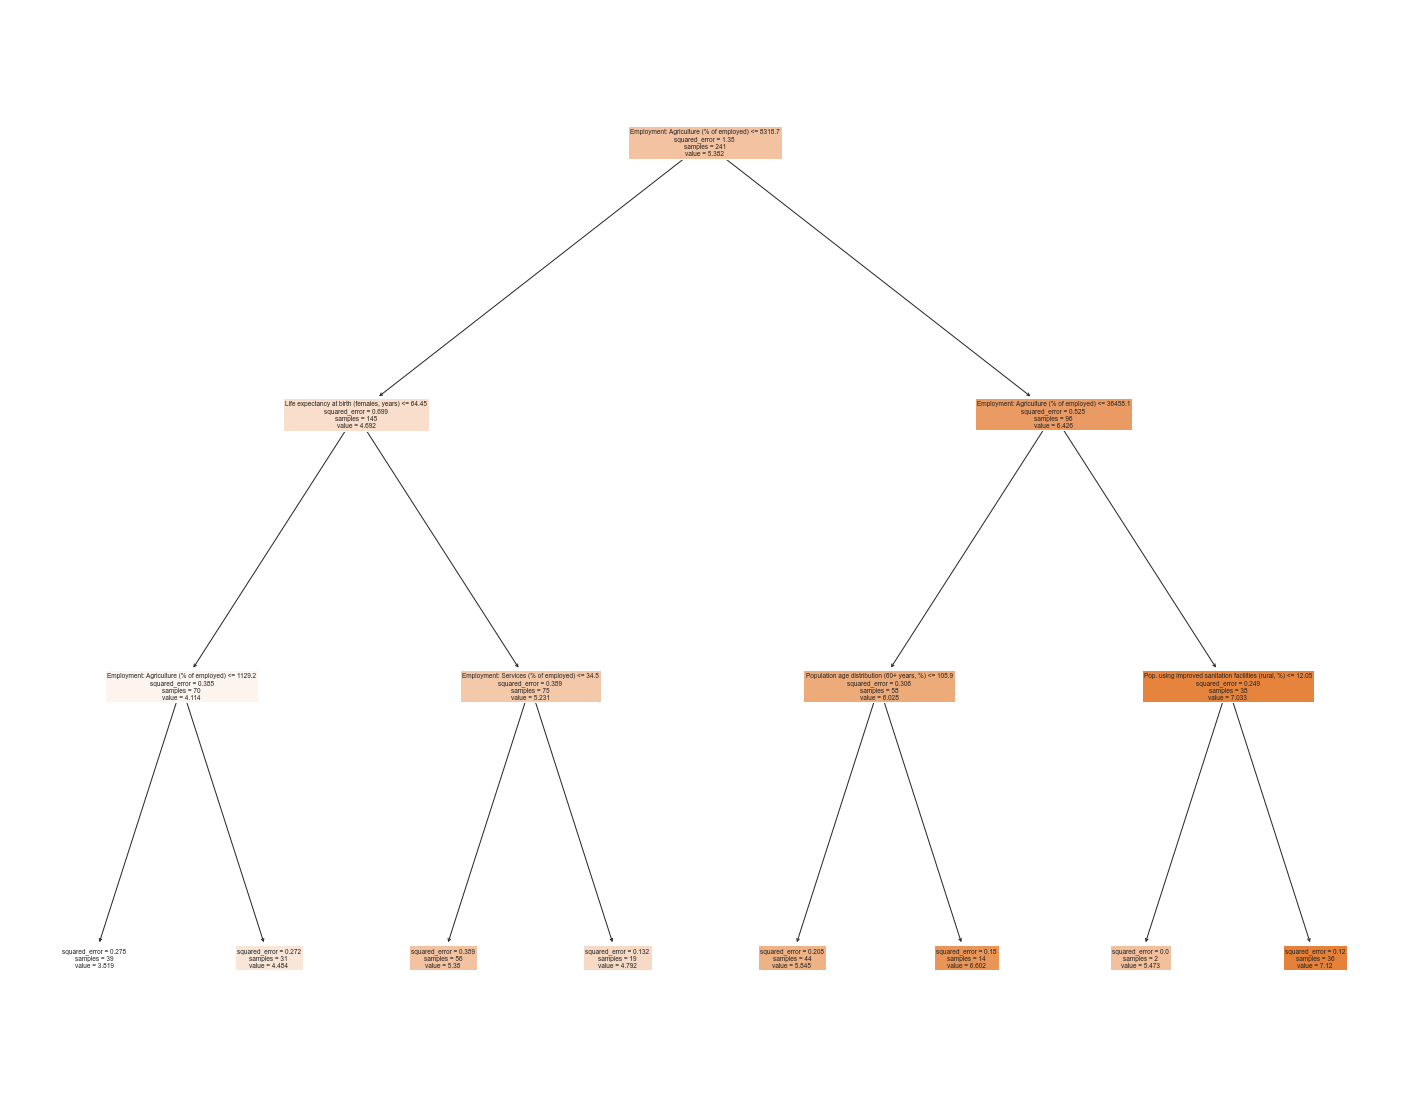

In [6]:
# Limit depth of tree to 3 levels
regressor_small =DecisionTreeRegressor(max_depth = 3, random_state = 0)
regressor_small.fit(X_train,y_train)


# Save the tree as a png image
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regressor_small, filled=True, feature_names = X_list.columns)

In [7]:
# Get numerical feature importances

importances = list(regressor.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Employment: Agriculture (% of employed) Importance: 0.64
Variable: Life expectancy at birth (females, years) Importance: 0.15
Variable: Employment: Services (% of employed) Importance: 0.04
Variable: Population age distribution (60+ years, %) Importance: 0.03
Variable: Education: Primary gross enrol. ratio (female per 100 pop.) Importance: 0.02
Variable: Pop. using improved sanitation facilities (rural, %) Importance: 0.01
Variable: Life expectancy at birth (males, years) Importance: 0.01
Variable: Education: Tertiary gross enrol. ratio (male per 100 pop.) Importance: 0.01
Variable: Infant mortality rate (per 1000 live births Importance: 0.01
Variable: GDP per capita (current US$) Importance: 0.01
Variable: Fertility rate, total (live births per woman) Importance: 0.01
Variable: Urban population (% of total population) Importance: 0.01
Variable: Population age distribution (0-14 years, %) Importance: 0.0
Variable: Pop. using improved sanitation facilities (urban, %) Importanc

# 2. Model with Most Important Features

In [8]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Extract features and lables 
y = df['happiness.score']
X = df[['Employment: Agriculture (% of employed)',
       'Life expectancy at birth (females, years)',
       'Employment: Services (% of employed)',
       'Population age distribution (60+ years, %)',
       'Education: Primary gross enrol. ratio (female per 100 pop.)']]

                                 
X_list = list(X.columns)
X = np.array(X)
y = np.array(y)
#Split the dataset into training and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

#Fitting the data
regressor = DecisionTreeRegressor (random_state = 0)
regressor.fit (X_train,y_train)

#Predicting the test set results 
y_pred = regressor.predict(X_test)


# Calculate and display accuracy
print('Accuracy_2:', regressor.score(X_train, y_train))
print()


#Error checking
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mae = mean_absolute_error (y_test, y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
mse = mean_squared_error (y_test, y_pred)
r_square = r2_score (y_test, y_pred)

print('Mean Absolute Error (MAE)\t:', mae )
print('Mean Absolute Percentage Error (MAPE)\t:',mape)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))
print('R-Square Error\t:', r_square)

Accuracy_2: 1.0

Mean Absolute Error (MAE)	: 0.49670494586131586
Mean Absolute Percentage Error (MAPE)	: 0.10014935315647752
Mean Squared Error (MSE) 	: 0.5542400319149567
Root Mean Squared Error (RMSE) 	: 0.7444729893790349
R-Square Error	: 0.516094221262645


In [9]:
data = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
data

,Real Values,Predicted Values
0,3.808,4.369
1,4.644,4.959
2,5.902,5.963
3,4.120,4.292
4,4.857,5.098
...,...,...
56,5.360,5.041
57,3.875,3.656
58,6.670,5.098
59,5.102,5.195


# 3. Model Based on Variables with Highest Correlation Values

In [10]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Extract features and lables 
y = df['happiness.score']
X = df[["Employment: Services (% of employed)",
                     "Life expectancy at birth (females, years)",
                    "Life expectancy at birth (males, years)",
                    "Education: Secondary gross enrol. ratio (male per 100 pop.)",
                     "Education: Secondary gross enrol. ratio (female per 100 pop.)",
                    "Individuals using the Internet (per 100 inhabitants)"]]

                                 
X_list = list(X.columns)
X = np.array(X)
y = np.array(y)
#Split the dataset into training and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

#Fitting the data
regressor = DecisionTreeRegressor (random_state = 0)
regressor.fit (X_train,y_train)

#Predicting the test set results 
y_pred = regressor.predict(X_test)


# Calculate and display accuracy
print('Accuracy_2:', regressor.score(X_train, y_train))
print()


#Error checking
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mae = mean_absolute_error (y_test, y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
mse = mean_squared_error (y_test, y_pred)
r_square = r2_score (y_test, y_pred)

print('Mean Absolute Error (MAE)\t:', mae )
print('Mean Absolute Percentage Error (MAPE)\t:',mape)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))
print('R-Square Error\t:', r_square)

Accuracy_2: 1.0

Mean Absolute Error (MAE)	: 0.5469344314825342
Mean Absolute Percentage Error (MAPE)	: 0.11365375986723633
Mean Squared Error (MSE) 	: 0.6912350588397846
Root Mean Squared Error (RMSE) 	: 0.831405471980901
R-Square Error	: 0.39648415816749893


In [11]:
data = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
data

,Real Values,Predicted Values
0,3.808,5.268
1,4.644,4.959
2,5.902,5.833
3,4.120,4.574
4,4.857,4.714
...,...,...
56,5.360,5.825
57,3.875,4.610
58,6.670,6.901
59,5.102,5.195


#### Conclusion
Model 1 is the best among the other two since it shows the lowest RMSE value and highest R^2 value. This means the for decision tree it requires most of the independent variable in order to give an accurate prediction
<br>
<br>
If we compare the RMSE and R^2 values, Random Forest still give the best and accurate prediction